<a href="https://colab.research.google.com/github/K2FA/PCVK_Genap_2023/blob/main/ProjekAkhir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [377]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [378]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

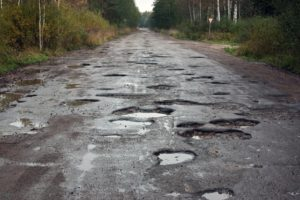

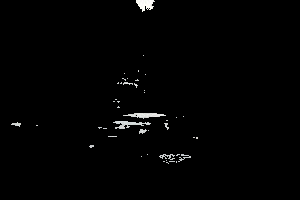

In [379]:
import cv2 as cv
import numpy as np

def color_segmentation(image, lower_hsv, upper_hsv):
    # Konversi gambar ke mode warna HSV
    hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

    # Buat mask dengan batasan warna yang ditentukan
    mask = cv.inRange(hsv_image, lower_hsv, upper_hsv)

    # Aplikasikan mask ke gambar asli
    segmented_image = cv.bitwise_and(image, image, mask=mask)

    return segmented_image

# Baca gambar input
image = cv.imread('/content/drive/MyDrive/PCVK/ProjekBesar/1.jpg')

# Tentukan batasan warna dalam mode HSV (segmen warna putih)
lower_hsv = np.array([0, 0, 200])  # Ubah nilai sesuai kebutuhan
upper_hsv = np.array([180,10, 255])  # Ubah nilai sesuai kebutuhan

# Lakukan segmentasi warna
segmented_image = color_segmentation(image, lower_hsv, upper_hsv)


# Tampilkan gambar asli, hasil segmentasi, dan hasil blob analysis
cv2_imshow(image)
cv2_imshow(segmented_image)

cv.waitKey(0)
cv.destroyAllWindows()

jumlah Lubang :  3


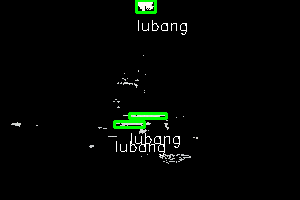

In [380]:
kotak = 0;

def blob_analysis(image):
    # Konversi gambar ke citra biner
    gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    _, binary_image = cv.threshold(gray_image, 210, 255, cv.THRESH_BINARY)

    # Temukan kontur pada citra biner
    contours, _ = cv.findContours(binary_image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    # Inisialisasi daftar lubang
    holes = []

    # Loop melalui setiap kontur dan identifikasi lubang
    for contour in contours:
        area = cv.contourArea(contour)
        if area > 5:  # Ubah nilai ambang sesuai kebutuhan
            x, y, w, h = cv.boundingRect(contour)
            hole = {
                'x': x,
                'y': y,
                'width': w,
                'height': h,
                'area': area
            }
            holes.append(hole)

    # Gambar kotak bounding box untuk setiap lubang
    blob_image = image.copy()
    for hole in holes:
        global kotak
        label = "lubang"
        x, y, w, h = hole['x'], hole['y'], hole['width'], hole['height']
        cv.rectangle(blob_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv.putText(blob_image, label, (x,y+30),cv.FONT_HERSHEY_SIMPLEX ,0.5, (255,255,255),  1)
        if label == "lubang":
          kotak+=1;

    return blob_image

# Lakukan blob analysis untuk mendeteksi lubang
result_image = blob_analysis(segmented_image)
print("jumlah Lubang : ", kotak)
cv2_imshow( result_image)
del kotak

In [381]:
image1 = cv.imread('/content/drive/MyDrive/PCVK/ProjekBesar/2.jpg')
image2 = cv.imread('/content/drive/MyDrive/PCVK/ProjekBesar/3.jpg')
image3 = cv.imread('/content/drive/MyDrive/PCVK/ProjekBesar/4.jpg')
image4 = cv.imread('/content/drive/MyDrive/PCVK/ProjekBesar/5.jpg')
image5 = cv.imread('/content/drive/MyDrive/PCVK/ProjekBesar/6.jpg')
image6 = cv.imread('/content/drive/MyDrive/PCVK/ProjekBesar/7.jpg')
image7 = cv.imread('/content/drive/MyDrive/PCVK/ProjekBesar/8.jpg')
image8 = cv.imread('/content/drive/MyDrive/PCVK/ProjekBesar/9.jpg')
image9 = cv.imread('/content/drive/MyDrive/PCVK/ProjekBesar/10.jpg')

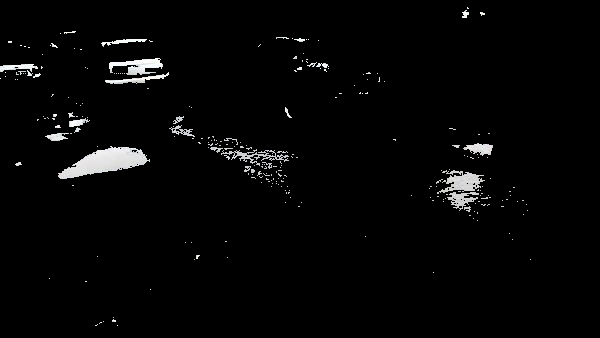

jumlah Lubang :  22


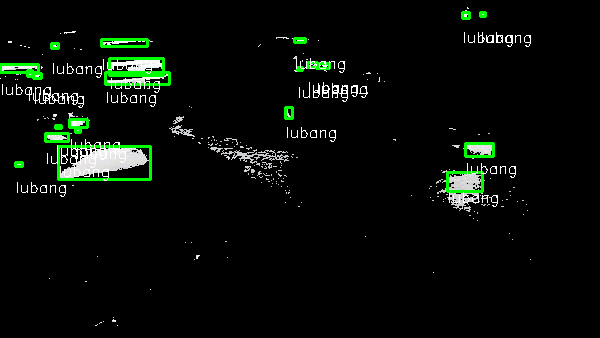

In [382]:
kotak = 0
segmented_image1 = color_segmentation(image1, lower_hsv, upper_hsv)
cv2_imshow(segmented_image1)
result_image1 = blob_analysis(segmented_image1)

print("jumlah Lubang : ", kotak)

# cv2_imshow(image7)
cv2_imshow( result_image1)

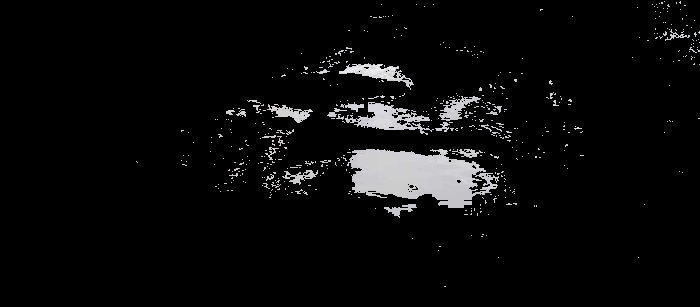

jumlah Lubang :  8


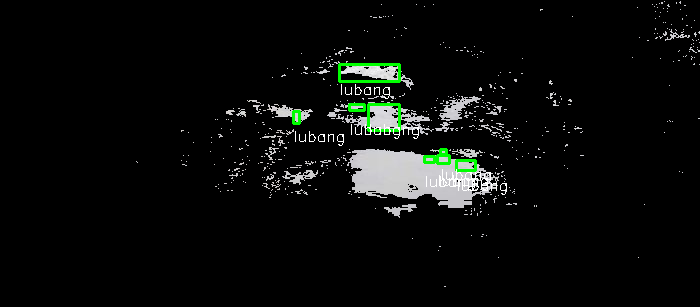

In [383]:
kotak = 0
segmented_image2 = color_segmentation(image2, lower_hsv, upper_hsv)
cv2_imshow(segmented_image2)
result_image2 = blob_analysis(segmented_image2)

print("jumlah Lubang : ", kotak)
# cv2_imshow(image7)
cv2_imshow( result_image2)

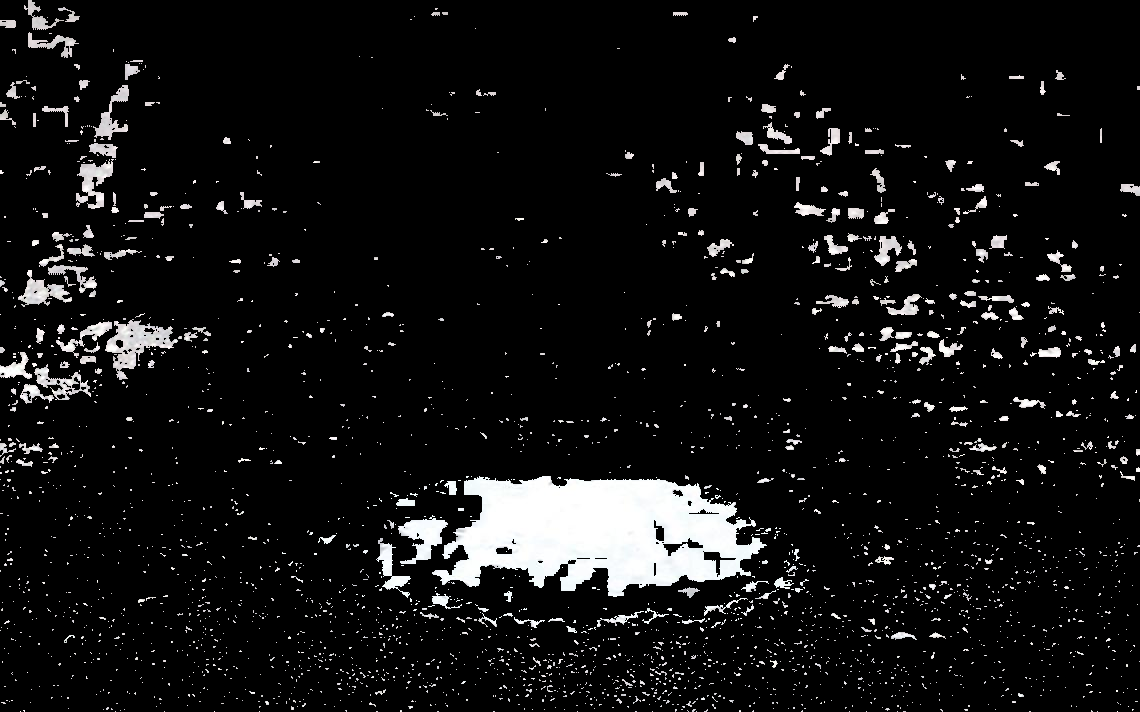

jumlah Lubang :  348


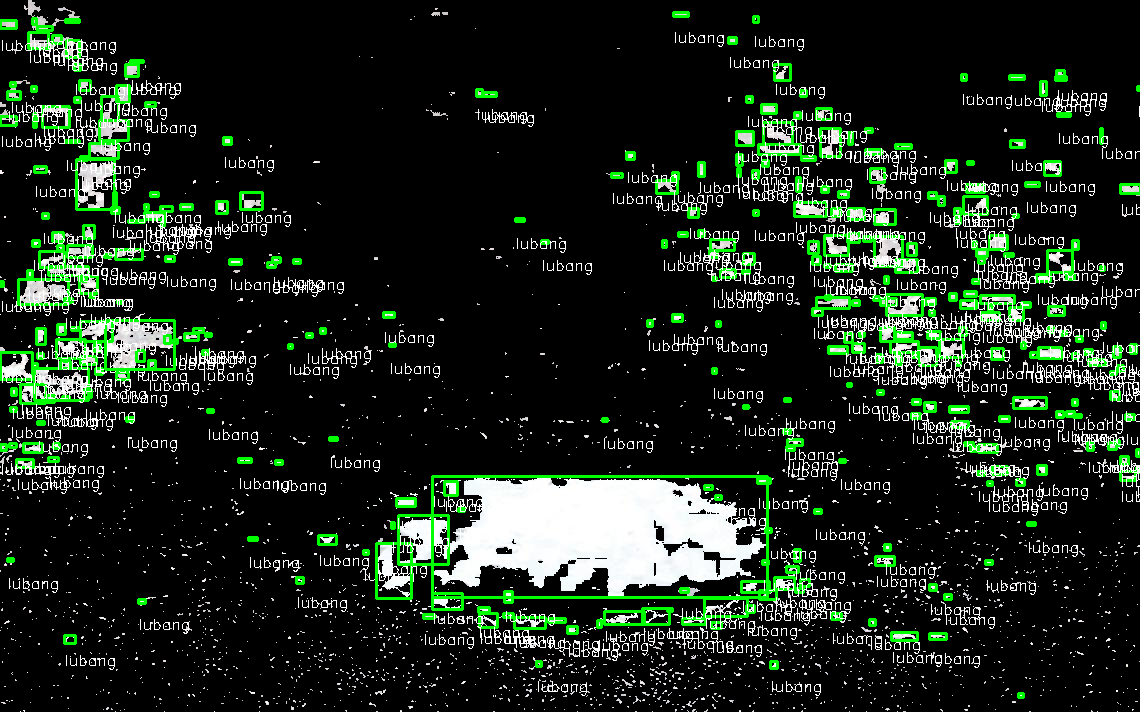

In [384]:
kotak = 0
segmented_image3 = color_segmentation(image3, lower_hsv, upper_hsv)
cv2_imshow(segmented_image3)
result_image3 = blob_analysis(segmented_image3)

print("jumlah Lubang : ", kotak)
# cv2_imshow(image7)
cv2_imshow( result_image3)

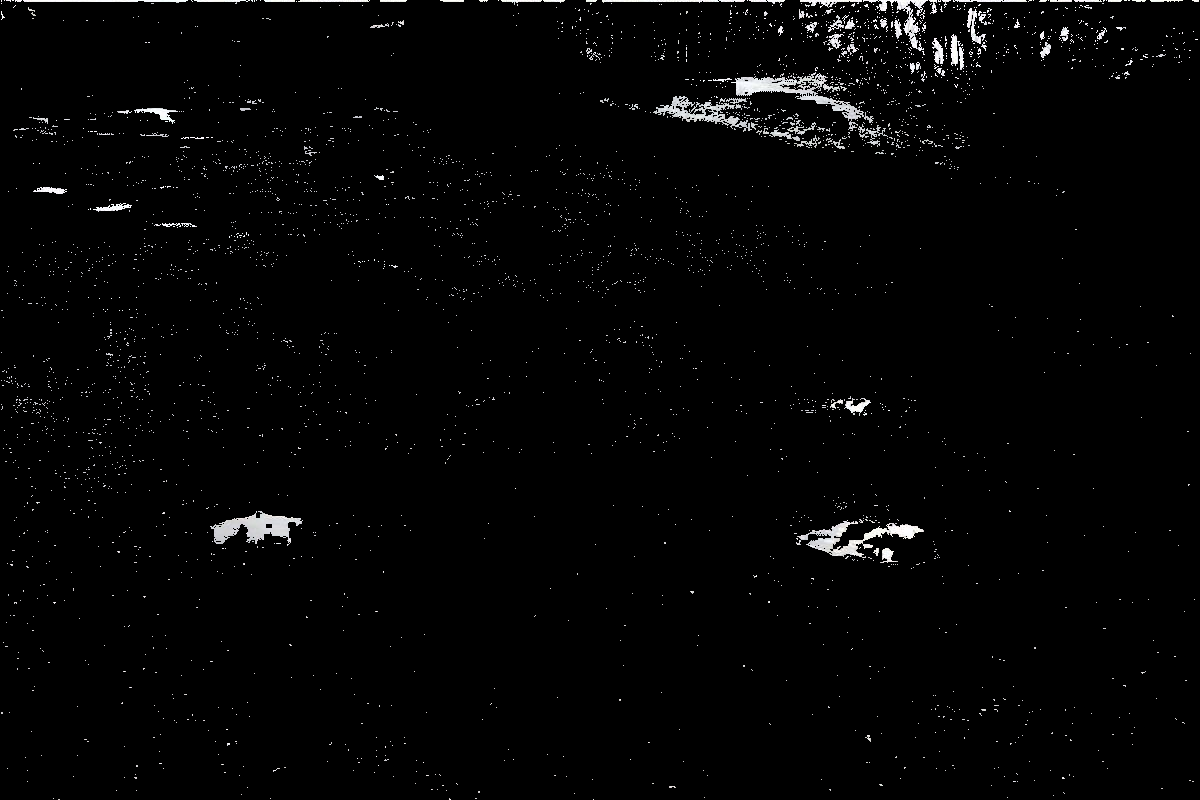

jumlah Lubang :  88


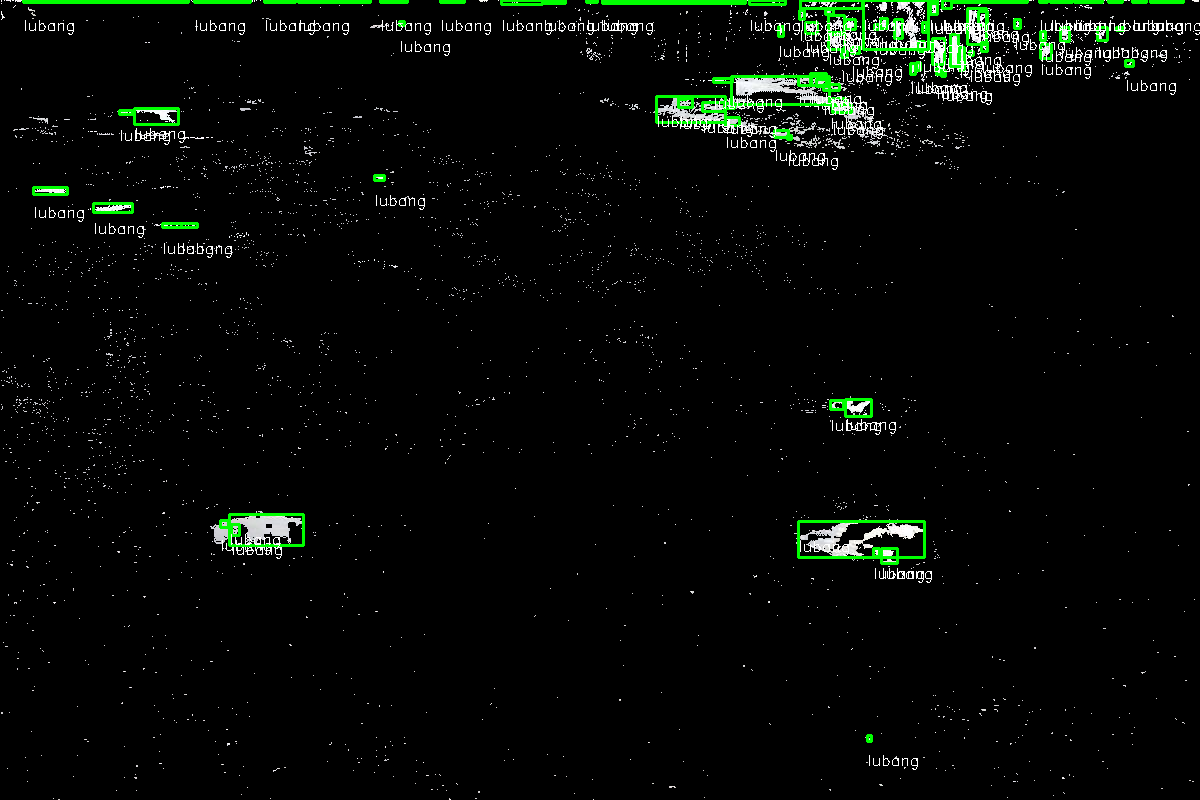

In [385]:
kotak = 0
segmented_image4 = color_segmentation(image4, lower_hsv, upper_hsv)
cv2_imshow(segmented_image4)
result_image4 = blob_analysis(segmented_image4)

print("jumlah Lubang : ", kotak)
# cv2_imshow(image7)
cv2_imshow( result_image4)

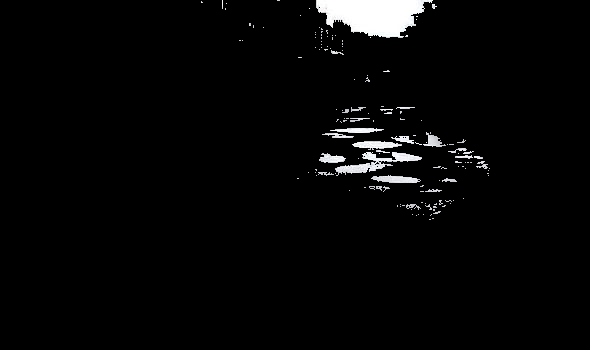

jumlah Lubang :  18


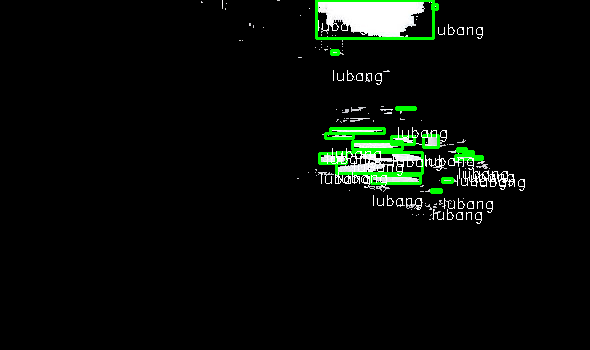

In [386]:
kotak = 0
segmented_image5 = color_segmentation(image5, lower_hsv, upper_hsv)
cv2_imshow(segmented_image5)
result_image5 = blob_analysis(segmented_image5)

print("jumlah Lubang : ", kotak)
# cv2_imshow(image5)
cv2_imshow( result_image5)

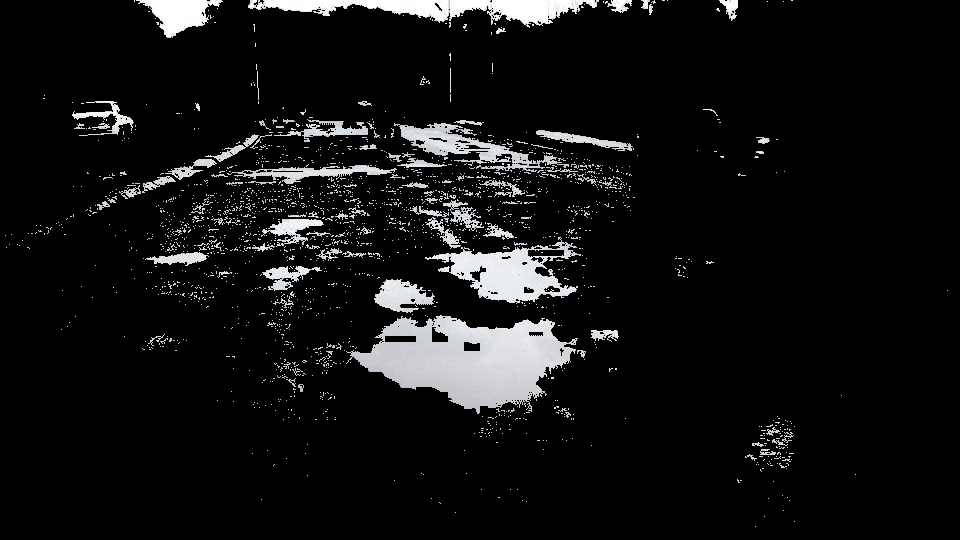

jumlah Lubang :  64


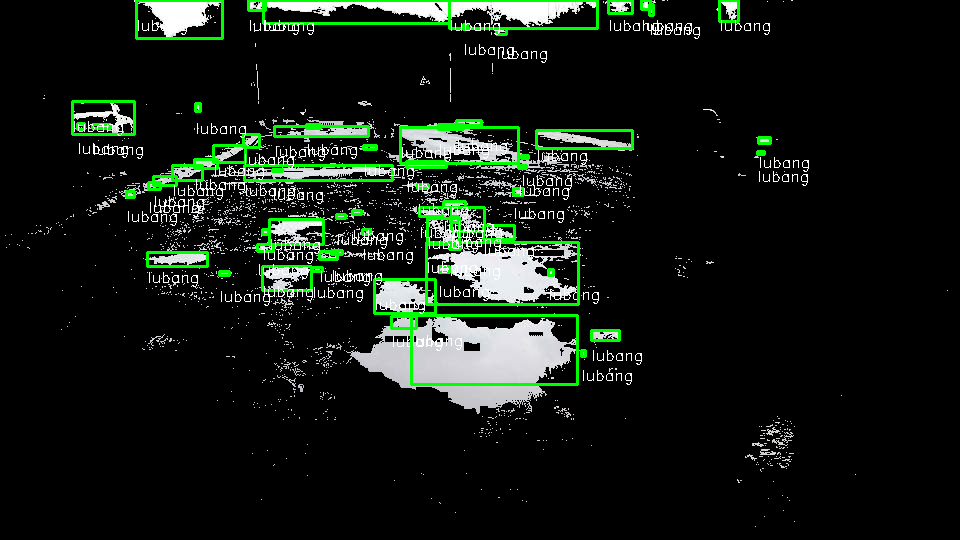

In [387]:
kotak = 0
segmented_image6 = color_segmentation(image6, lower_hsv, upper_hsv)
cv2_imshow(segmented_image6)
result_image6 = blob_analysis(segmented_image6)

print("jumlah Lubang : ", kotak)
# cv2_imshow(image7)
cv2_imshow( result_image6)

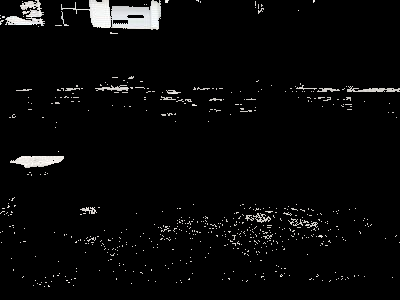

jumlah Lubang :  8


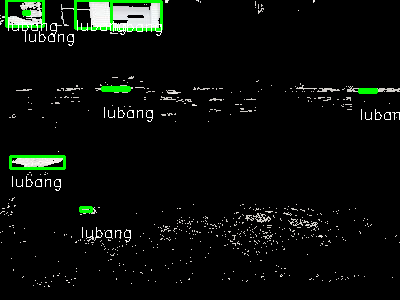

In [388]:
kotak = 0
segmented_image7 = color_segmentation(image7, lower_hsv, upper_hsv)
cv2_imshow(segmented_image7)
result_image7 = blob_analysis(segmented_image7)

print("jumlah Lubang : ", kotak)
# cv2_imshow(image7)
cv2_imshow( result_image7)

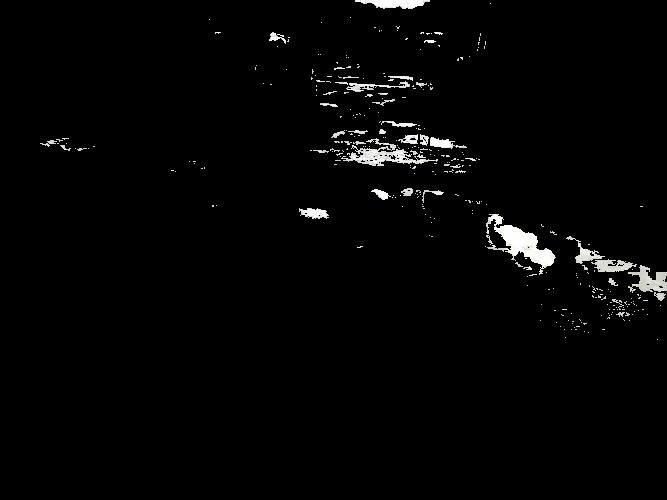

jumlah Lubang :  34


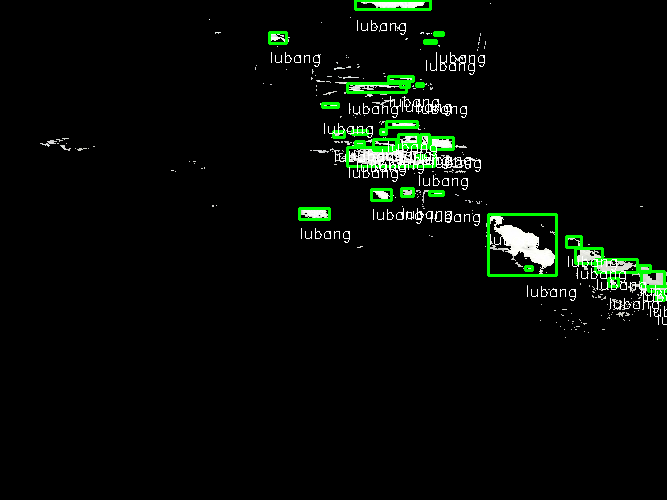

In [389]:
kotak = 0
segmented_image8 = color_segmentation(image8, lower_hsv, upper_hsv)
cv2_imshow(segmented_image8)
result_image8 = blob_analysis(segmented_image8)

print("jumlah Lubang : ", kotak)
# cv2_imshow(image8)
cv2_imshow( result_image8)

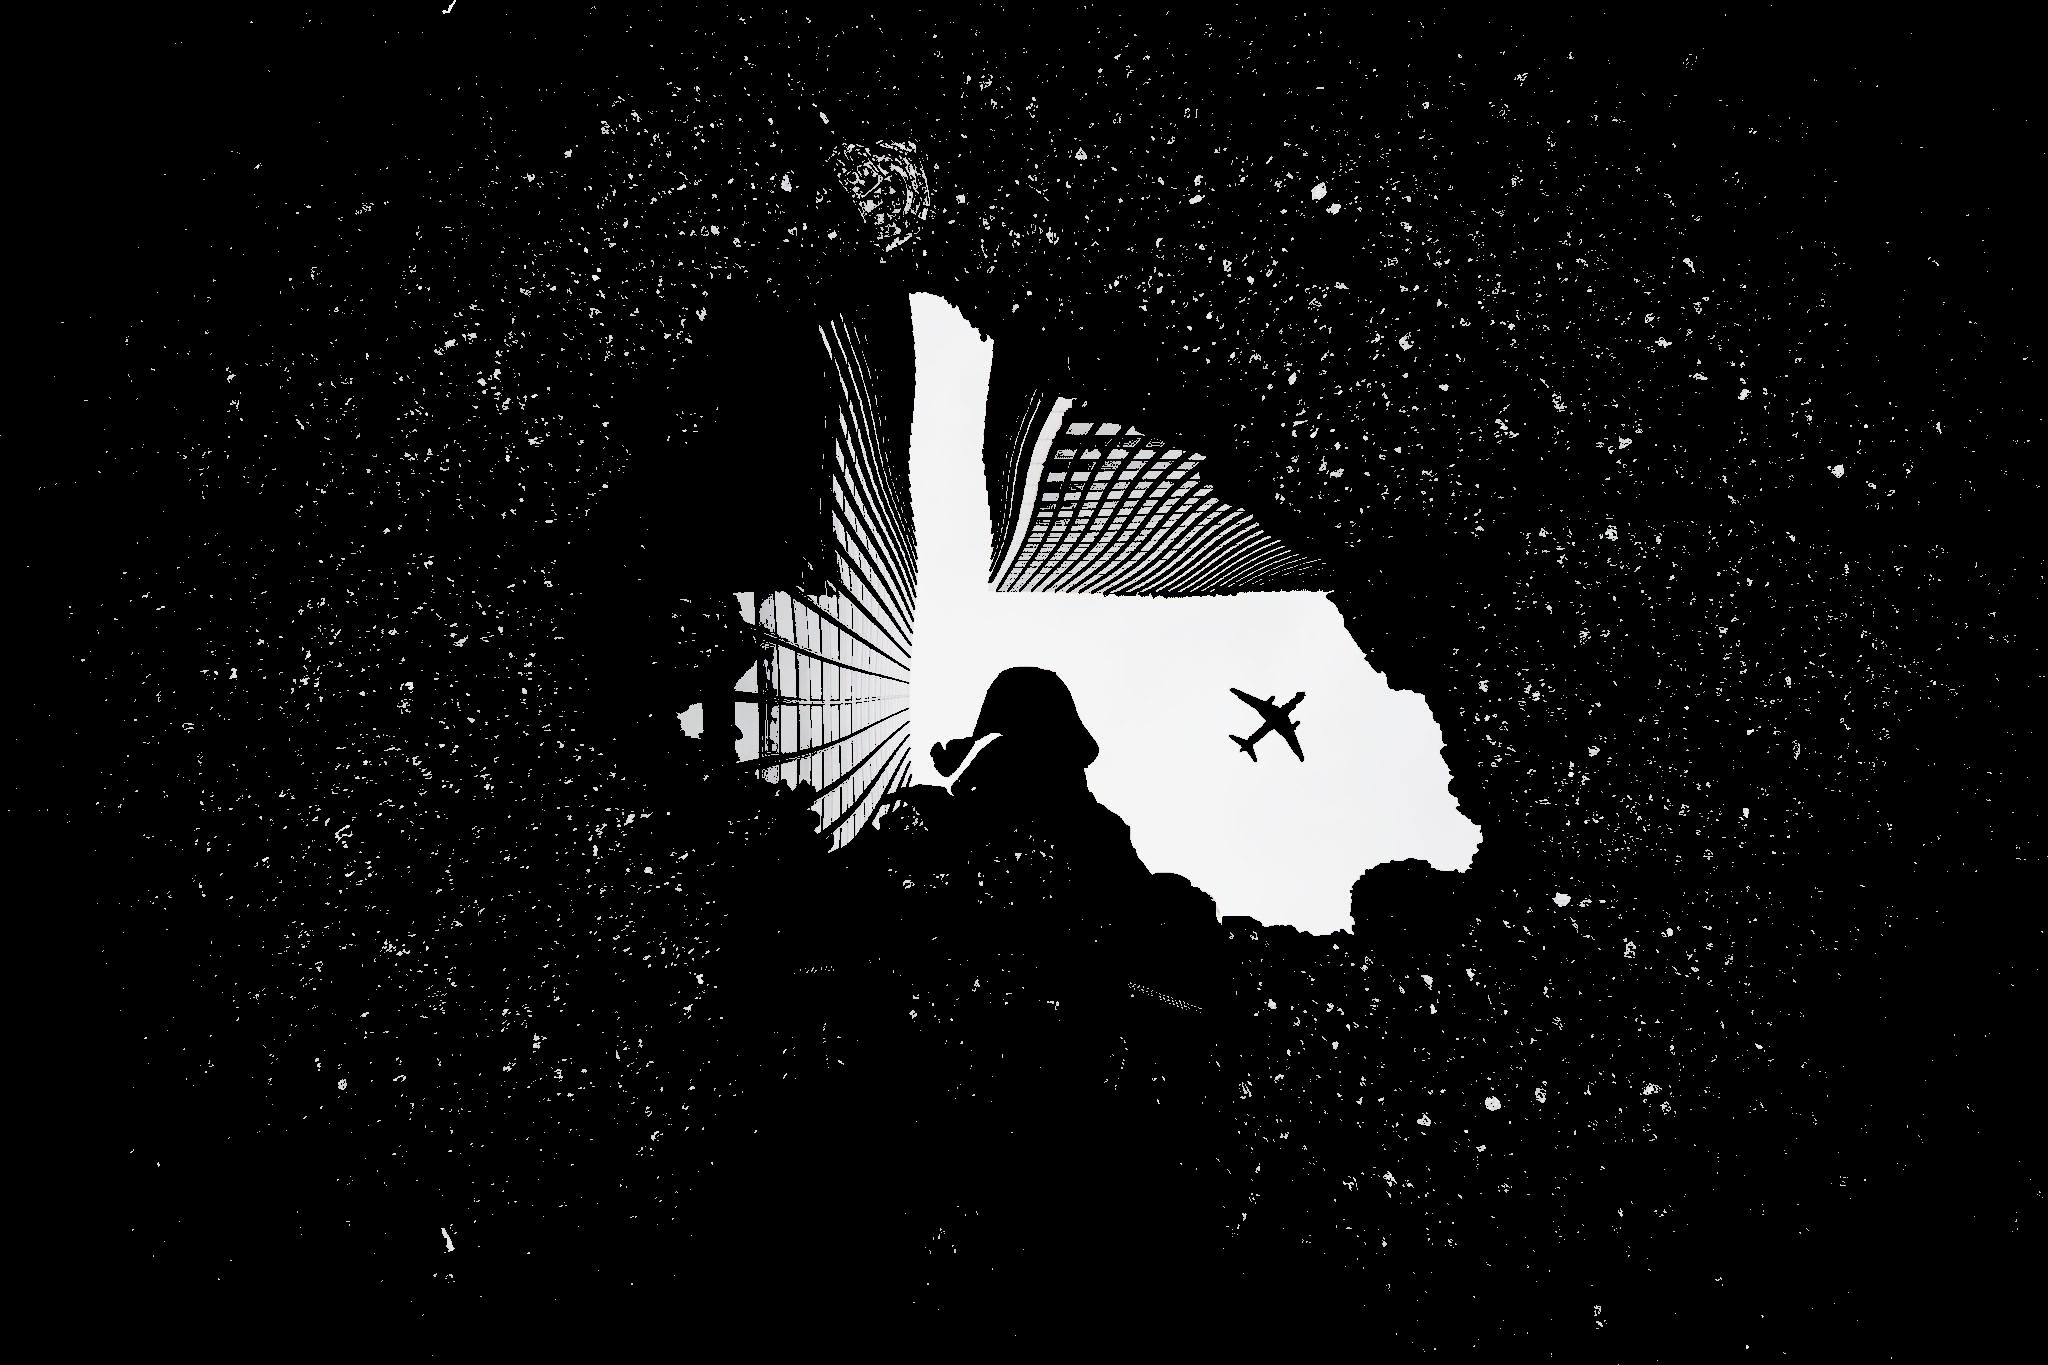

jumlah Lubang :  337


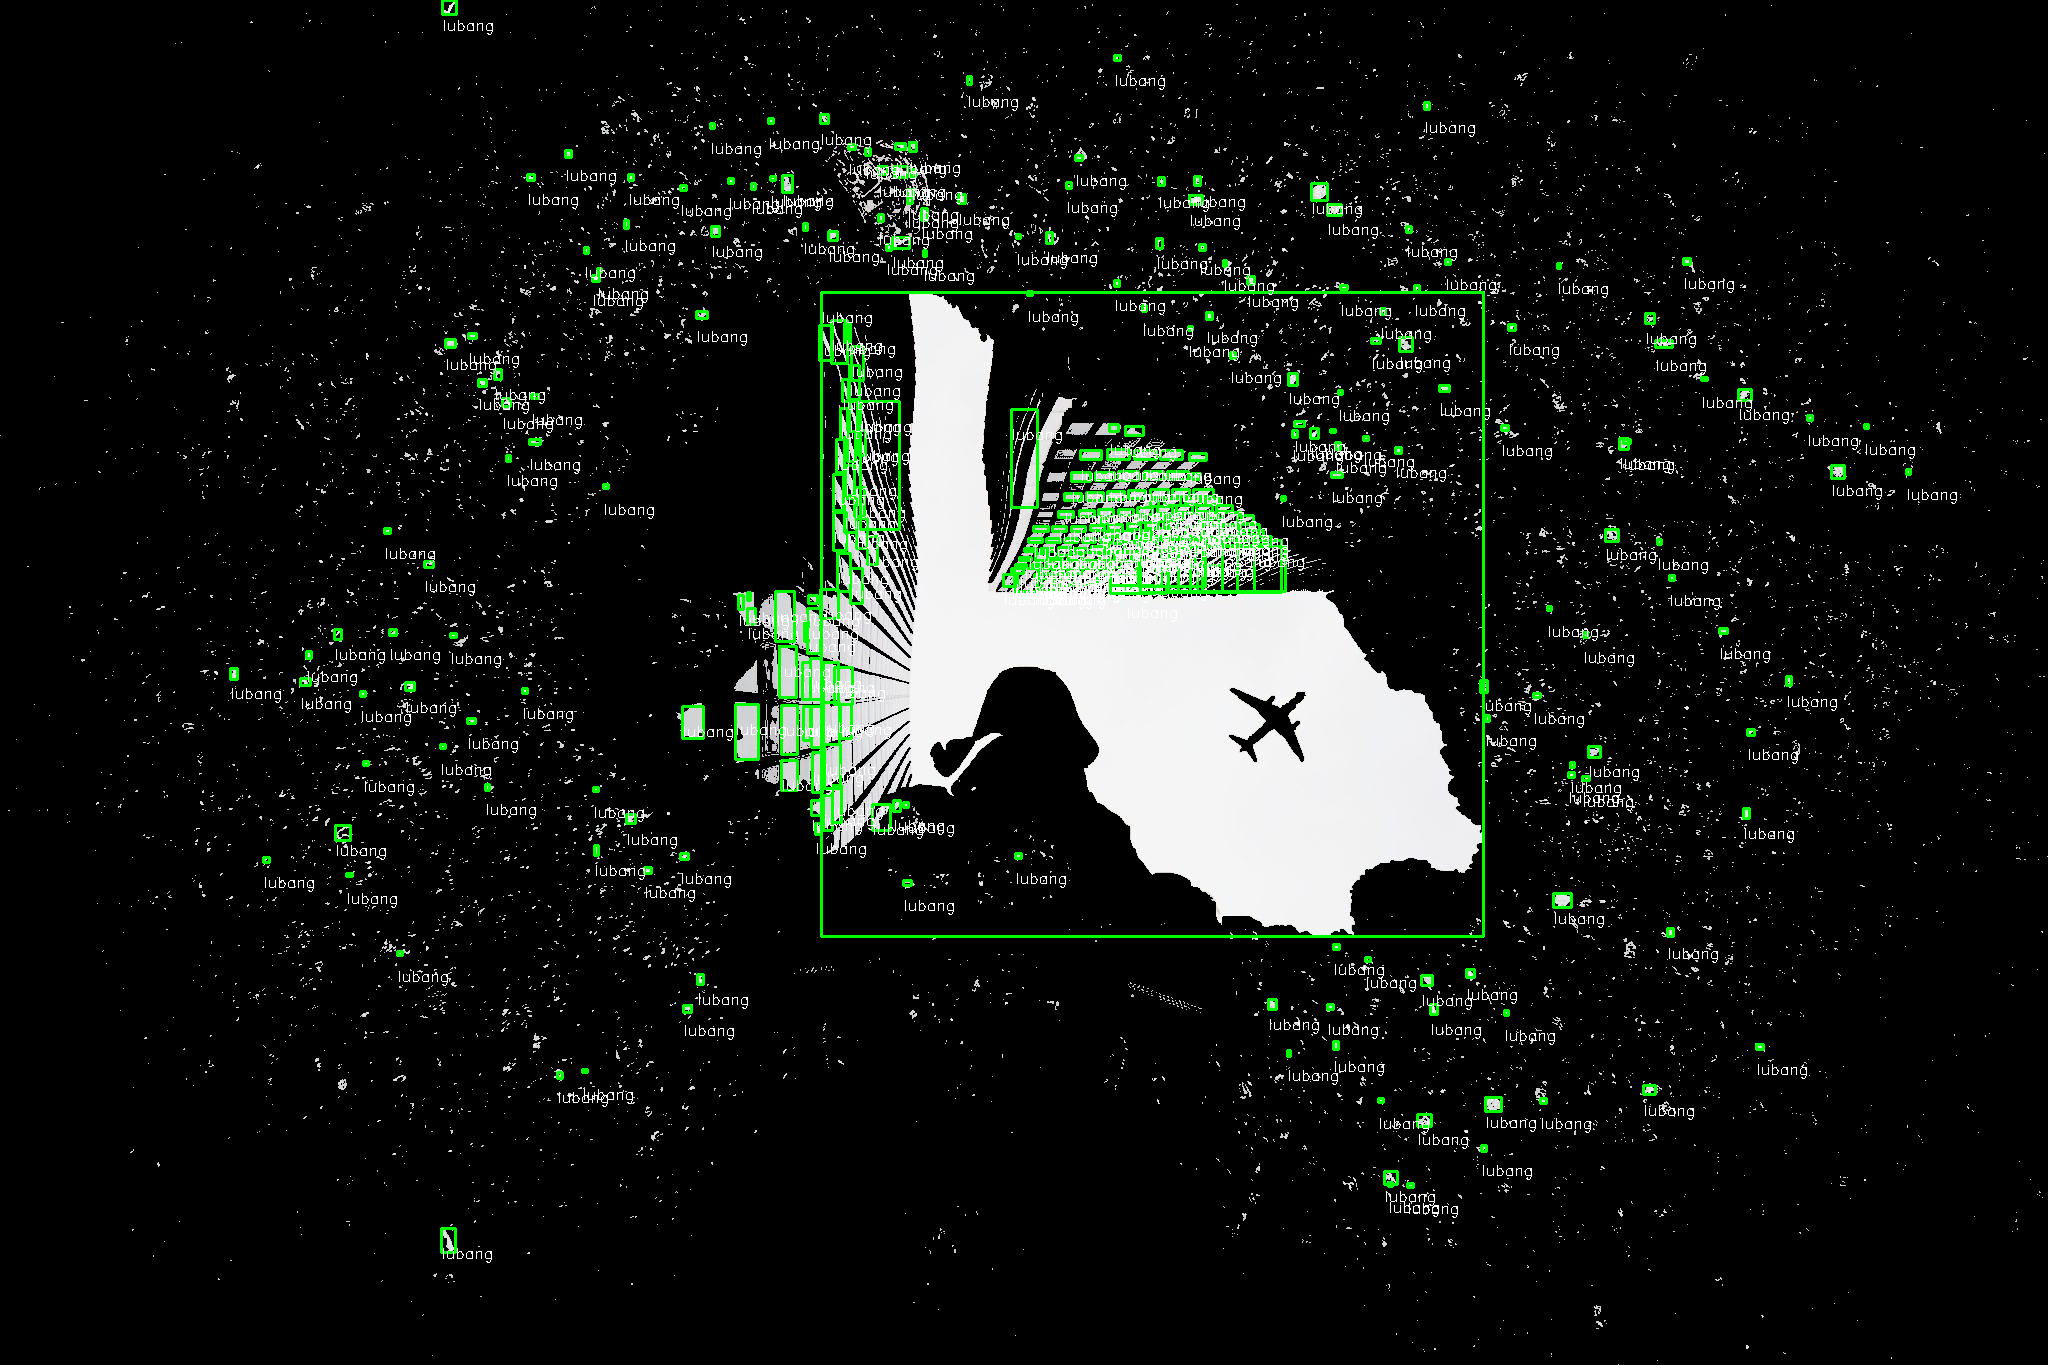

In [390]:
kotak = 0
segmented_image9 = color_segmentation(image9, lower_hsv, upper_hsv)
cv2_imshow(segmented_image9)
result_image9 = blob_analysis(segmented_image9)

print("jumlah Lubang : ", kotak)
# cv2_imshow(image7)
cv2_imshow( result_image9)